#📌 Extracão

In [1]:
import pandas as pd

In [2]:
import requests

url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/refs/heads/main/TelecomX_Data.json'

df = pd.read_json(url)

df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


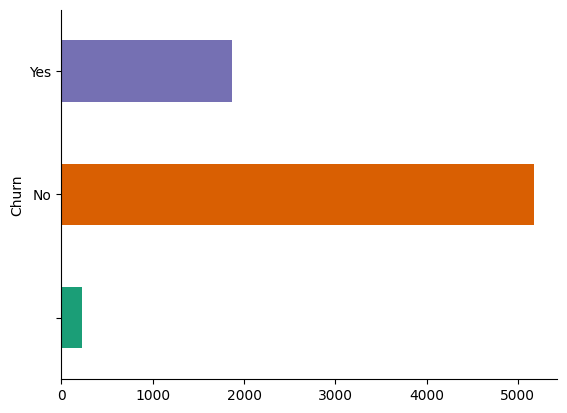

In [4]:
# @title Churn

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Churn').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

#🔧 Transformação

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [6]:
df.describe(include='all')

,customerID,Churn,customer,phone,internet,account
count,7267,7267,7267,7267,7267,7267
unique,7267,3,891,3,129,6931
top,9995-HOTOH,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'No', 'OnlineSecurity': 'N...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
freq,1,5174,223,3495,1581,6


In [7]:
df.isnull().sum()

,0
customerID,0
Churn,0
customer,0
phone,0
internet,0
account,0


In [8]:
df_customer = pd.json_normalize(df['customer'])
df_phone = pd.json_normalize(df['phone'])
df_internet = pd.json_normalize(df['internet'])
df_account = pd.json_normalize(df['account'])

df_final = pd.concat([df['Churn'], df_customer, df_phone, df_internet, df_account], axis=1)

In [9]:
print("Informações do novo DataFrame transformado:")
df_final.info()

Informações do novo DataFrame transformado:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7267 non-null   object 
 1   gender            7267 non-null   object 
 2   SeniorCitizen     7267 non-null   int64  
 3   Partner           7267 non-null   object 
 4   Dependents        7267 non-null   object 
 5   tenure            7267 non-null   int64  
 6   PhoneService      7267 non-null   object 
 7   MultipleLines     7267 non-null   object 
 8   InternetService   7267 non-null   object 
 9   OnlineSecurity    7267 non-null   object 
 10  OnlineBackup      7267 non-null   object 
 11  DeviceProtection  7267 non-null   object 
 12  TechSupport       7267 non-null   object 
 13  StreamingTV       7267 non-null   object 
 14  StreamingMovies   7267 non-null   object 
 15  Contract          7267 non-null   object 
 16

In [10]:
df_final.head()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [11]:
# Criando a coluna 'Contas_Diarias' a partir de 'MonthlyCharges'
# Vamos considerar um mês com 30 dias para o cálculo da média diária.
df_final['Contas_Diarias'] = df_final['Charges.Monthly'] / 30

# Exibindo as colunas originais e a nova para verificar o resultado
# Usamos .round(2) para limitar a duas casas decimais e facilitar a leitura.
print("Verificação da nova coluna 'Contas_Diarias':")
print(df_final[['Charges.Monthly', 'Contas_Diarias']].head().round(2))

Verificação da nova coluna 'Contas_Diarias':
   Charges.Monthly  Contas_Diarias
0             65.6            2.19
1             59.9            2.00
2             73.9            2.46
3             98.0            3.27
4             83.9            2.80


In [12]:
mapa_nomes = {
    'gender': 'Genero', 'SeniorCitizen': 'Idoso', 'Partner': 'PossuiParceiro',
    'Dependents': 'PossuiDependentes', 'tenure': 'MesesContrato',
    'PhoneService': 'AssinaTelefone', 'MultipleLines': 'MultiplasLinhas',
    'InternetService': 'ServicoInternet', 'OnlineSecurity': 'SegurancaOnline',
    'OnlineBackup': 'BackupOnline', 'DeviceProtection': 'ProtecaoDispositivo',
    'TechSupport': 'SuporteTecnico', 'StreamingTV': 'AssinaStreamingTV',
    'StreamingMovies': 'AssinaStreamingFilmes', 'Contract': 'TipoContrato',
    'PaperlessBilling': 'FaturaDigital', 'PaymentMethod': 'MetodoPagamento',
    'Charges.Monthly': 'FaturaMensal', 'Charges.Total': 'FaturaTotal'
}
df_final.rename(columns=mapa_nomes, inplace=True)


In [13]:
# Mapa para colunas com 'Yes'/'No'
mapa_binario_ingles = {'Yes': 1, 'No': 0}
colunas_binarias = ['Churn', 'PossuiParceiro', 'PossuiDependentes', 'AssinaTelefone', 'FaturaDigital']
for coluna in colunas_binarias:
    df_final[coluna] = df_final[coluna].map(mapa_binario_ingles)

# Mapa para 'Genero' e conversão de 'Idoso'
df_final['Genero'] = df_final['Genero'].map({'Male': 0, 'Female': 1})
df_final['Idoso'] = df_final['Idoso'].astype(int)
print("-> Concluído.")

print("\nPASSO 4: Corrigindo o tipo de dado da 'FaturaTotal'...")
df_final['FaturaTotal'] = pd.to_numeric(df_final['FaturaTotal'], errors='coerce')
df_final['FaturaTotal'].fillna(0, inplace=True)
print("-> Concluído.")

print("\n--- VERIFICAÇÃO FINAL ---")
print("5 primeiras linhas do DataFrame final e corrigido:")
print(df_final.head())
print("\nInformações e tipos de dados finais:")
df_final.info()

-> Concluído.

PASSO 4: Corrigindo o tipo de dado da 'FaturaTotal'...
-> Concluído.

--- VERIFICAÇÃO FINAL ---
5 primeiras linhas do DataFrame final e corrigido:
   Churn  Genero  Idoso  PossuiParceiro  PossuiDependentes  MesesContrato  \
0    0.0       1      0               1                  1              9   
1    0.0       0      0               0                  0              9   
2    1.0       0      0               0                  0              4   
3    1.0       0      1               1                  0             13   
4    1.0       1      1               1                  0              3   

   AssinaTelefone MultiplasLinhas ServicoInternet SegurancaOnline  ...  \
0               1              No             DSL              No  ...   
1               1             Yes             DSL              No  ...   
2               1              No     Fiber optic              No  ...   
3               1              No     Fiber optic              No  ...   
4    

<ipython-input-13-1981131581>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_final['FaturaTotal'].fillna(0, inplace=True)


#📊 Carga e análise

In [14]:
# Gera estatísticas descritivas para todas as colunas numéricas
# Usamos .T (transpor) para que as colunas virem linhas, facilitando a leitura
analise_descritiva = df_final.describe().T

# Exibindo o resultado
print("--- Análise Descritiva dos Dados ---")
print(analise_descritiva)

--- Análise Descritiva dos Dados ---
                    count         mean          std        min         25%  \
Churn              7043.0     0.265370     0.441561   0.000000    0.000000   
Genero             7267.0     0.494289     0.500002   0.000000    0.000000   
Idoso              7267.0     0.162653     0.369074   0.000000    0.000000   
PossuiParceiro     7267.0     0.484106     0.499782   0.000000    0.000000   
PossuiDependentes  7267.0     0.300124     0.458343   0.000000    0.000000   
MesesContrato      7267.0    32.346498    24.571773   0.000000    9.000000   
AssinaTelefone     7267.0     0.902711     0.296371   0.000000    1.000000   
FaturaDigital      7267.0     0.593230     0.491265   0.000000    0.000000   
FaturaMensal       7267.0    64.720098    30.129572  18.250000   35.425000   
FaturaTotal        7267.0  2277.182035  2268.648587   0.000000  396.200000   
Contas_Diarias     7267.0     2.157337     1.004319   0.608333    1.180833   

                          

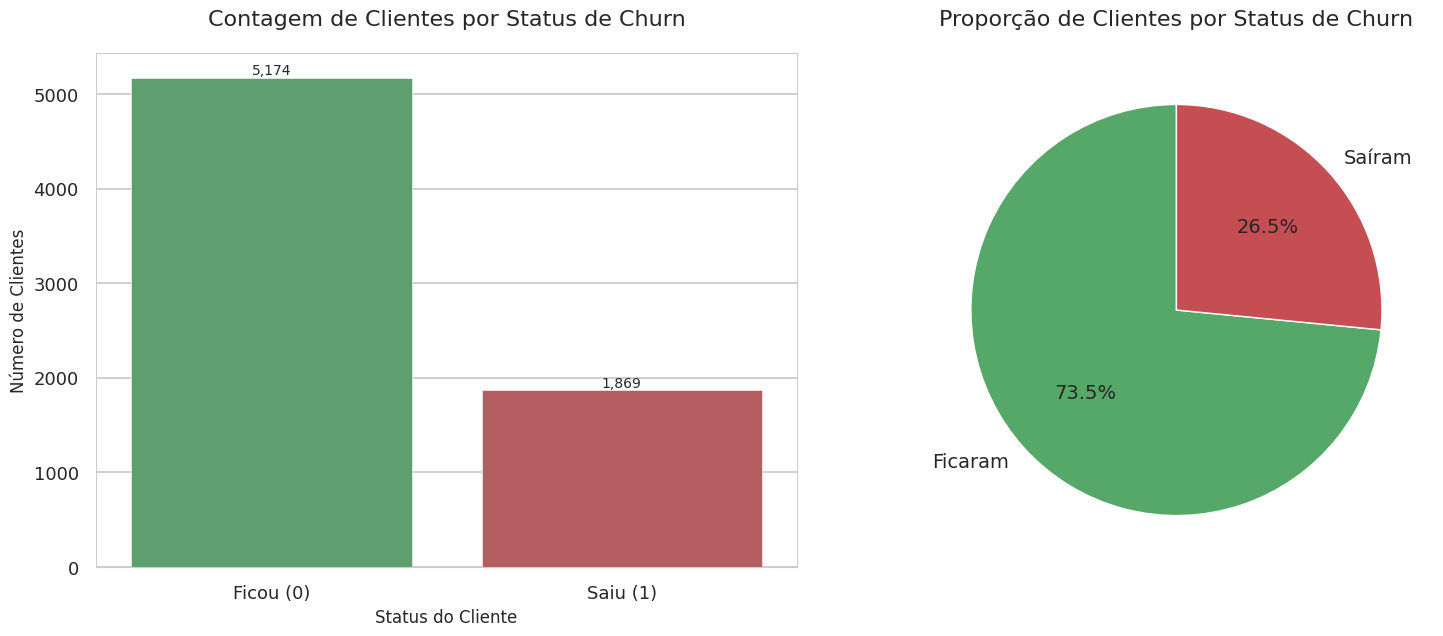

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurando a aparência dos gráficos
sns.set_style('whitegrid')
plt.style.use('seaborn-v0_8-talk')

# Criando a figura e os eixos para os subplots
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 7))

# --- Gráfico 1: Contagem de Churn (Gráfico de Barras) - CÓDIGO ATUALIZADO ---
# Adicionado hue='Churn' e legend=False para seguir as novas práticas do Seaborn
sns.countplot(x='Churn', data=df_final, ax=ax1, hue='Churn', legend=False, palette=['#55A868', '#C44E52'])
ax1.set_title('Contagem de Clientes por Status de Churn', fontsize=16, pad=20)
ax1.set_xlabel('Status do Cliente', fontsize=12)
ax1.set_ylabel('Número de Clientes', fontsize=12)

# Adicionado ax1.set_xticks para seguir as boas práticas do Matplotlib
ax1.set_xticks([0, 1])
ax1.set_xticklabels(['Ficou (0)', 'Saiu (1)'])

# Adicionando os números exatos em cima de cada barra
for container in ax1.containers:
    ax1.bar_label(container, fmt='{:,.0f}'.format)


# --- Gráfico 2: Proporção de Churn (Gráfico de Pizza) ---
# (Este código não gerou avisos e pode ser mantido como está)
churn_counts = df_final['Churn'].value_counts()
labels = ['Ficaram', 'Saíram']
colors = ['#55A868', '#C44E52']

ax2.pie(churn_counts, labels=labels, colors=colors, autopct='%.1f%%', startangle=90,
        textprops={'fontsize': 14}, wedgeprops = {'linewidth': 1, 'edgecolor' : 'white'})
ax2.set_title('Proporção de Clientes por Status de Churn', fontsize=16, pad=20)


# Otimizando o layout e exibindo os gráficos
plt.tight_layout(pad=3.0)
plt.show()

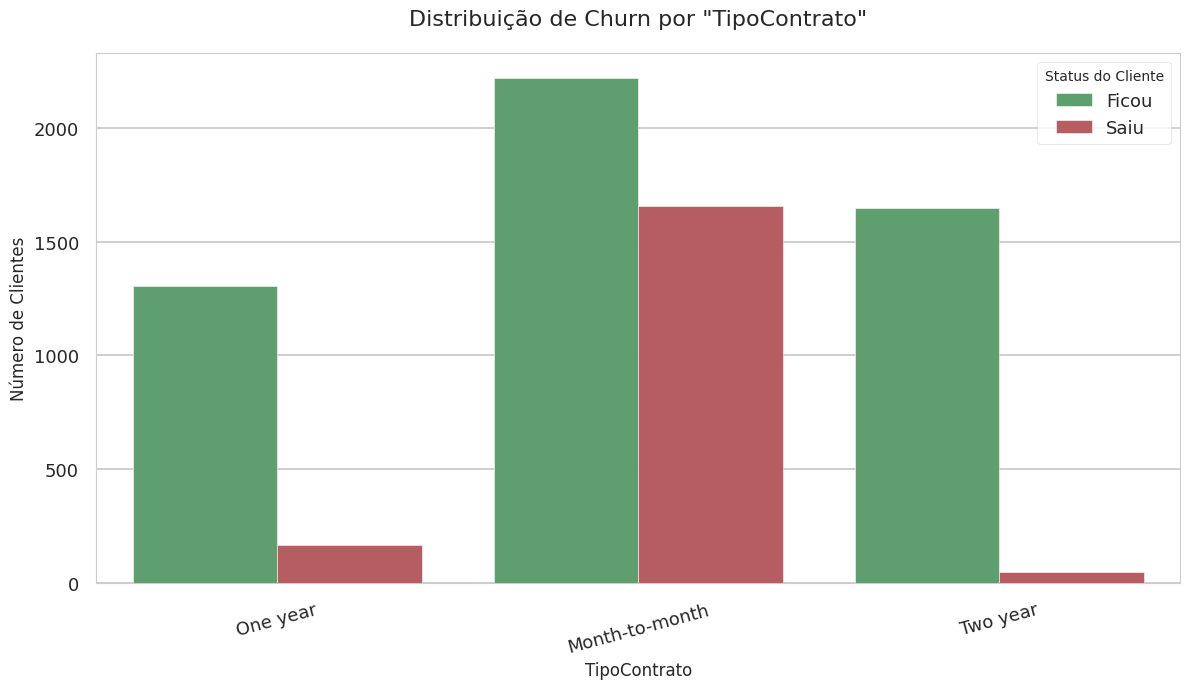

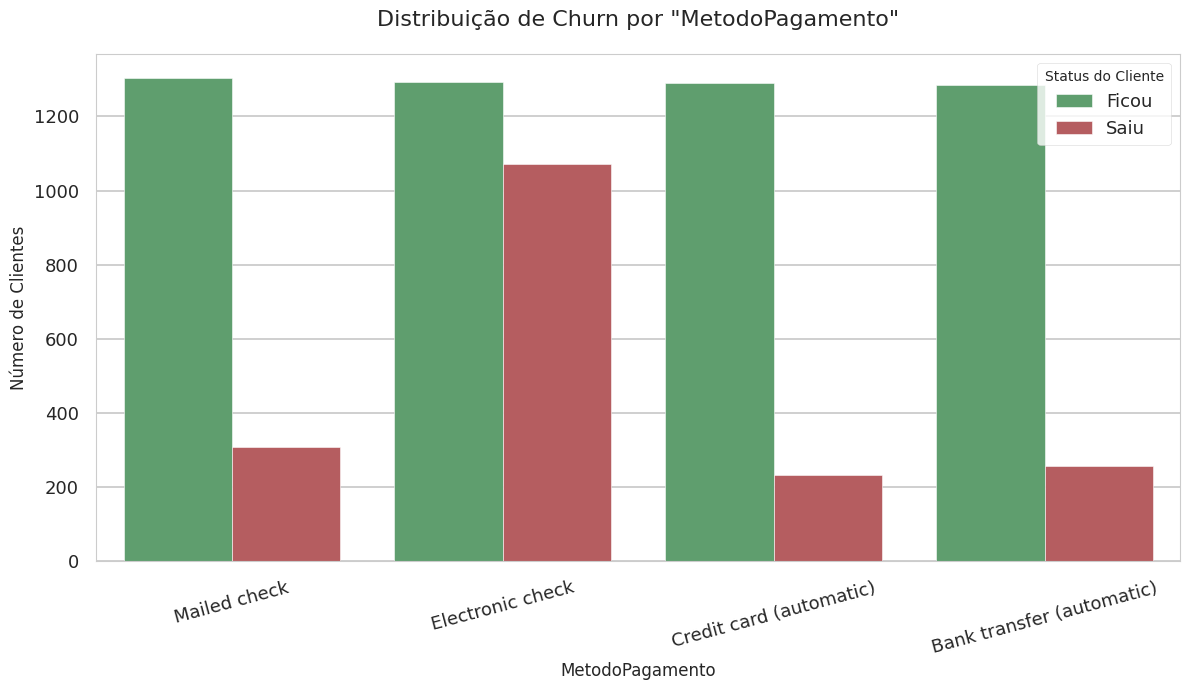

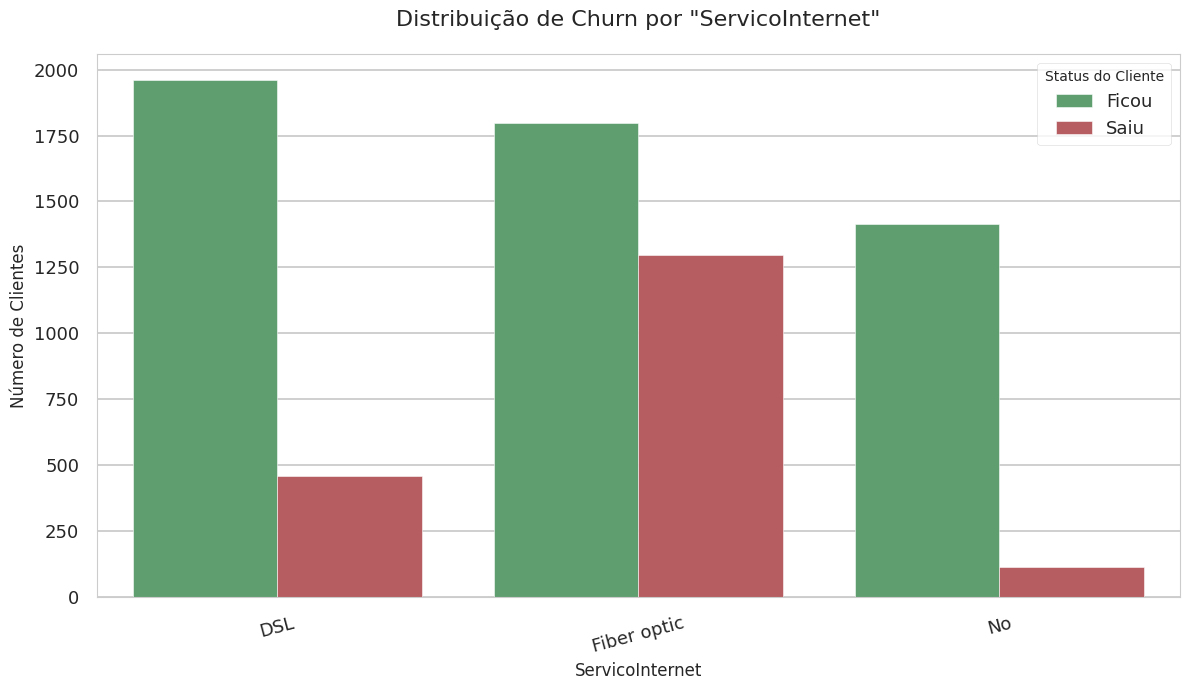

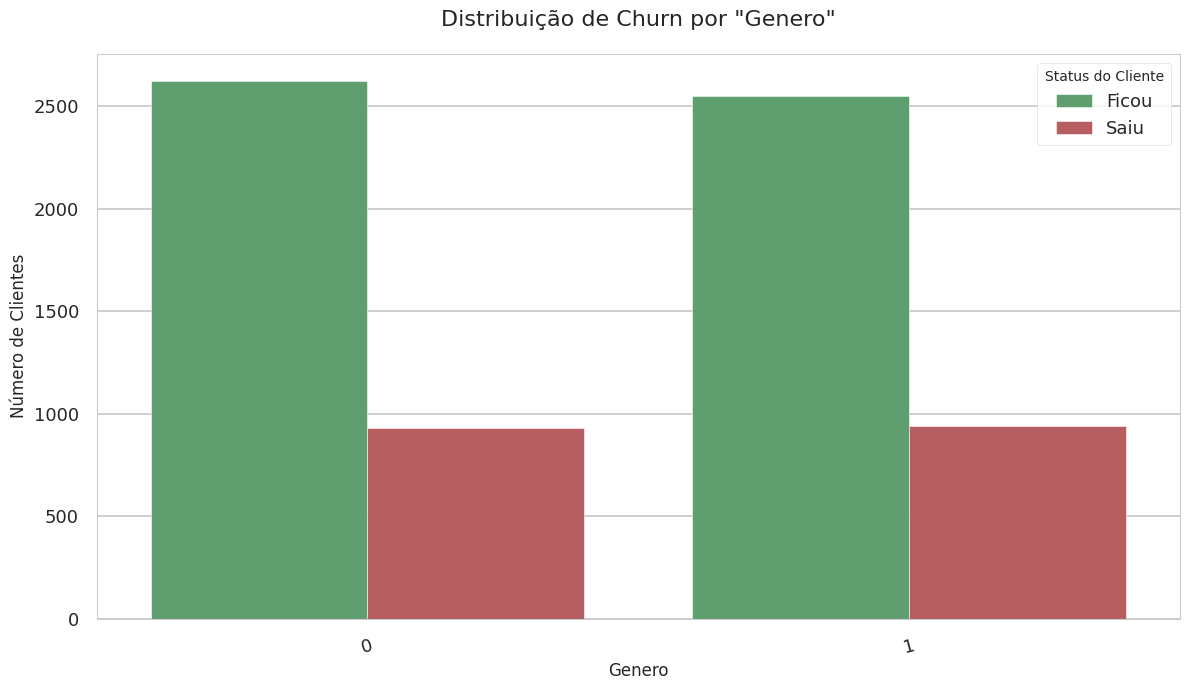

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Lista das colunas categóricas que queremos analisar em relação ao Churn
colunas_categoricas = [
    'TipoContrato',
    'MetodoPagamento',
    'ServicoInternet',
    'Genero'
]

# Definindo a paleta de cores que estamos usando
# Verde ('#55A868') para quem ficou, Vermelho ('#C44E52') para quem saiu
churn_palette = ['#55A868', '#C44E52']

# Loop para criar um gráfico para cada coluna da lista
for coluna in colunas_categoricas:
    # Criando a figura para o gráfico
    plt.figure(figsize=(12, 7))

    # Criando o gráfico de contagem agrupado por 'Churn'
    sns.countplot(x=coluna, hue='Churn', data=df_final, palette=churn_palette)

    # Configurações do gráfico
    plt.title(f'Distribuição de Churn por "{coluna}"', fontsize=16, pad=20)
    plt.xlabel(coluna, fontsize=12)
    plt.ylabel('Número de Clientes', fontsize=12)
    plt.xticks(rotation=15) # Rotaciona os rótulos do eixo X para não sobrepor

    # Ajustando a legenda
    # 0 = Ficou, 1 = Saiu
    handles, labels = plt.gca().get_legend_handles_labels()
    plt.legend(handles, ['Ficou', 'Saiu'], title='Status do Cliente')

    # Exibindo o gráfico
    plt.tight_layout()
    plt.show()

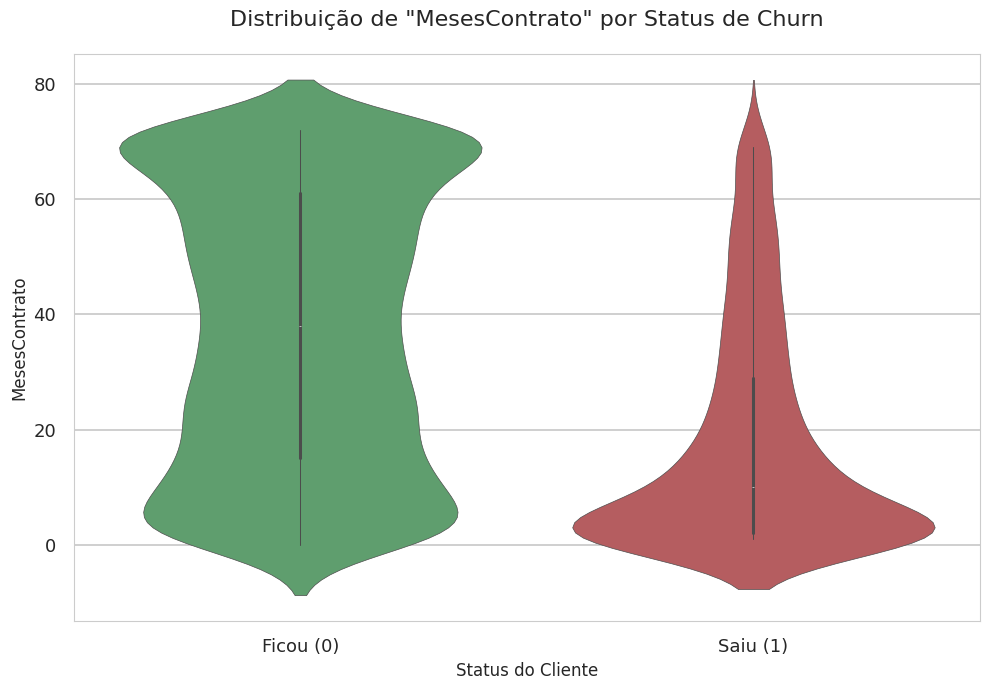

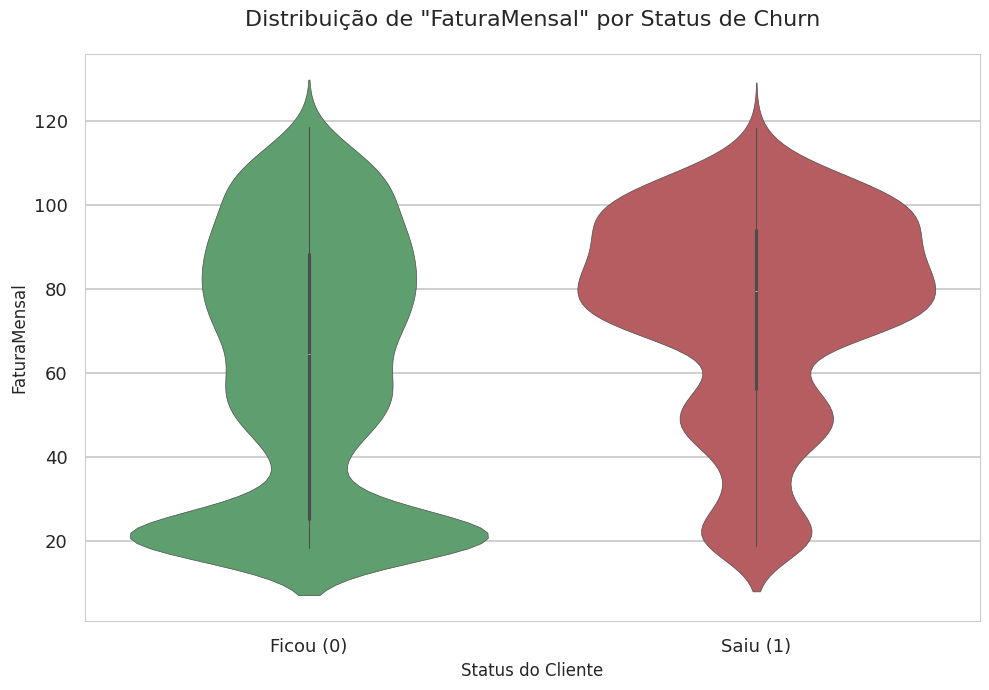

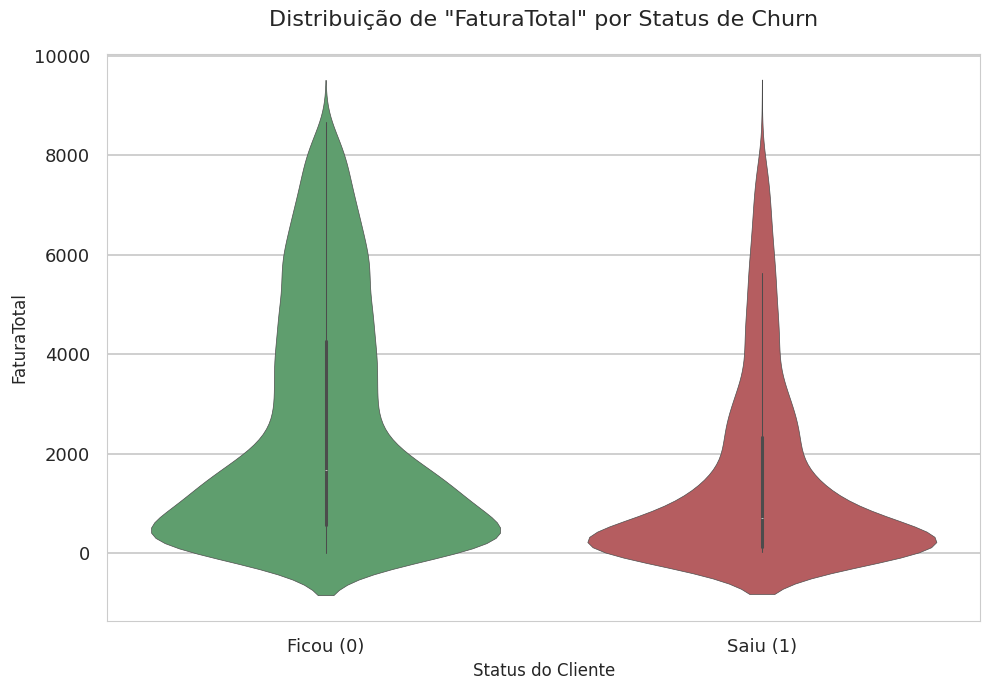

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Lista das colunas numéricas que queremos analisar
colunas_numericas = [
    'MesesContrato',
    'FaturaMensal',
    'FaturaTotal'
]

# Definindo a paleta de cores
churn_palette = ['#55A868', '#C44E52']

# Loop para criar um gráfico para cada coluna da lista
for coluna in colunas_numericas:
    plt.figure(figsize=(10, 7))

    # --- Linha Corrigida ---
    # Adicionado hue='Churn' e legend=False para seguir as novas práticas
    sns.violinplot(x='Churn', y=coluna, data=df_final, hue='Churn', legend=False, palette=churn_palette)

    # Configurações do gráfico
    plt.title(f'Distribuição de "{coluna}" por Status de Churn', fontsize=16, pad=20)
    plt.xlabel('Status do Cliente', fontsize=12)
    plt.ylabel(coluna, fontsize=12)
    plt.xticks([0, 1], ['Ficou (0)', 'Saiu (1)'])

    # Exibindo o gráfico
    plt.tight_layout()
    plt.show()

#📄Relatorio Final

In [21]:
# --- CÉLULA DE FUNÇÕES DE PLOTAGEM ---
# Defina todas as funções de gráfico aqui uma única vez.

def plot_churn_geral():
    """Gera os gráficos de contagem e proporção da variável Churn."""
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 7))
    churn_palette = ['#55A868', '#C44E52']

    # Gráfico de Barras
    sns.countplot(x='Churn', data=df_final, ax=ax1, hue='Churn', legend=False, palette=churn_palette)
    ax1.set_title('Contagem de Clientes por Status de Churn', fontsize=16, pad=20)
    ax1.set_xlabel('Status do Cliente', fontsize=12)
    ax1.set_ylabel('Número de Clientes', fontsize=12)
    ax1.set_xticks([0, 1])
    ax1.set_xticklabels(['Ficou (0)', 'Saiu (1)'])
    for container in ax1.containers:
        ax1.bar_label(container, fmt='{:,.0f}'.format)

    # Gráfico de Pizza
    churn_counts = df_final['Churn'].value_counts()
    labels = ['Ficaram', 'Saíram']
    ax2.pie(churn_counts, labels=labels, colors=churn_palette, autopct='%.1f%%', startangle=90, textprops={'fontsize': 14}, wedgeprops={'linewidth': 1, 'edgecolor': 'white'})
    ax2.set_title('Proporção de Clientes por Status de Churn', fontsize=16, pad=20)

    plt.tight_layout(pad=3.0)
    plt.show()

def plot_churn_categorico(nome_coluna):
    """Gera um gráfico de barras agrupado para uma variável categórica vs. Churn."""
    plt.figure(figsize=(12, 7))
    churn_palette = ['#55A868', '#C44E52']
    sns.countplot(x=nome_coluna, hue='Churn', data=df_final, palette=churn_palette)
    plt.title(f'Distribuição de Churn por "{nome_coluna}"', fontsize=16, pad=20)
    plt.xlabel(nome_coluna, fontsize=12)
    plt.ylabel('Número de Clientes', fontsize=12)
    plt.xticks(rotation=15)
    handles, labels = plt.gca().get_legend_handles_labels()
    plt.legend(handles, ['Ficou', 'Saiu'], title='Status do Cliente')
    plt.tight_layout()
    plt.show()

def plot_churn_numerico(nome_coluna):
    """Gera um gráfico de violino para uma variável numérica vs. Churn."""
    plt.figure(figsize=(10, 7))
    churn_palette = ['#55A868', '#C44E52']
    sns.violinplot(x='Churn', y=nome_coluna, data=df_final, hue='Churn', legend=False, palette=churn_palette)
    plt.title(f'Distribuição de "{nome_coluna}" por Status de Churn', fontsize=16, pad=20)
    plt.xlabel('Status do Cliente', fontsize=12)
    plt.ylabel(nome_coluna, fontsize=12)
    plt.xticks([0, 1], ['Ficou (0)', 'Saiu (1)'])
    plt.tight_layout()
    plt.show()

##Análise de Evasão de Clientes (Churn)
Autor: João Vitor Soares Santana

Data: 10 de junho de 2025

##1. Introdução
A retenção de clientes é um pilar fundamental para a sustentabilidade de qualquer negócio, sendo significativamente mais custosa a aquisição de um novo cliente do que a manutenção de um existente. A evasão de clientes, ou "Churn", representa a taxa na qual clientes deixam de utilizar os serviços de uma empresa, impactando diretamente a receita e a estabilidade do negócio.

  O objetivo desta análise foi mergulhar nos dados da empresa para entender os principais fatores que levam um cliente a cancelar seu contrato. Através da identificação de perfis, padrões e comportamentos associados ao churn, buscamos gerar insights que permitam à empresa desenvolver estratégias de retenção mais eficazes e direcionadas.

##2. Limpeza e Tratamento de Dados
Para garantir a qualidade e a consistência da análise, os dados brutos passaram por um rigoroso processo de tratamento e preparação. As seguintes etapas foram executadas:

Importação e Tratamento de Dados Aninhados: Os dados foram carregados de um arquivo JSON e sua estrutura aninhada foi "achatada" com pandas.json_normalize para criar um DataFrame funcional.

Renomeação de Colunas: As colunas foram renomeadas para o português para maior clareza (ex: Charges.Monthly para FaturaMensal).

Conversão de Dados: Colunas textuais ('Yes'/'No', 'Male'/'Female') foram convertidas para o formato numérico binário (1/0) para viabilizar cálculos estatísticos.

Correção de Tipos: A coluna FaturaTotal foi devidamente convertida para formato numérico (float), com valores inconsistentes sendo tratados adequadamente.

##3. Análise Exploratória de Dados
Com os dados limpos, iniciamos uma profunda análise exploratória para identificar padrões.

### a) Análise da Taxa de Churn Geral

A análise inicial revelou que, dos 7.043 clientes na base, 1.869 cancelaram o serviço, resultando em uma taxa de churn geral de 26.5%. Este é o número central que buscamos reduzir.

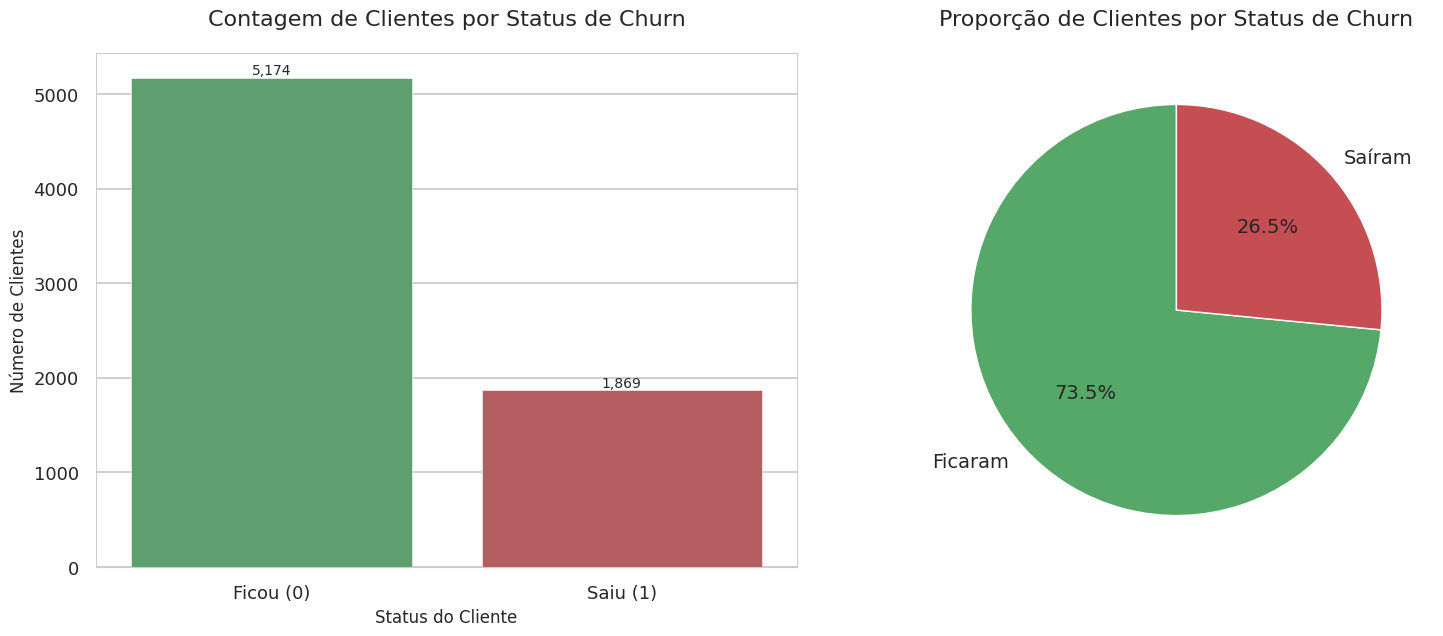

In [22]:
plot_churn_geral()

### b) Churn vs. Variáveis Categóricas

A análise de segmentos revelou os fatores mais impactantes para o churn:

Tipo de Contrato: É o indicador mais forte. Clientes com contrato Month-to-month (Mensal) dominam massivamente o volume de cancelamentos. Em contraste, clientes com contratos de One year e Two year demonstram altíssima lealdade.

Método de Pagamento: Clientes que utilizam Electronic check (Boleto Eletrônico) apresentam uma taxa de churn alarmante, quase tão alta quanto a de retenção. Métodos de pagamento automáticos (Credit card e Bank transfer) estão associados a taxas de churn muito baixas.

Serviço de Internet: O serviço de Fiber optic (Fibra Óptica) possui uma taxa de evasão significativamente maior que o serviço DSL. Clientes sem serviço de internet quase não cancelam.

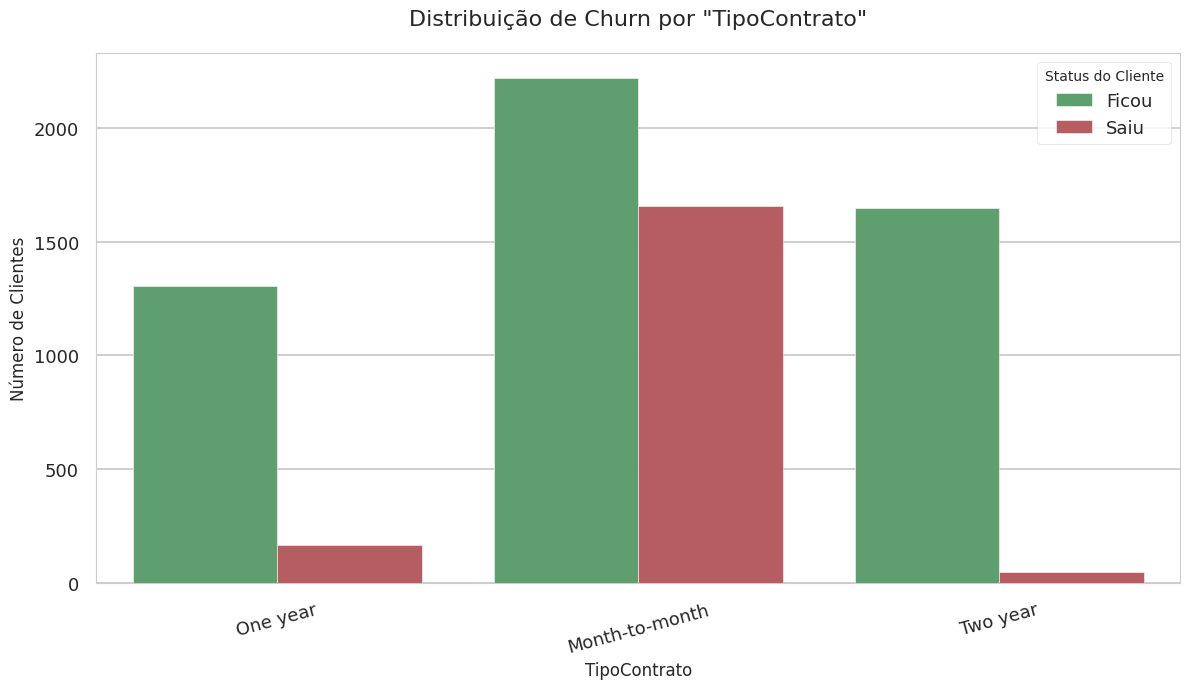

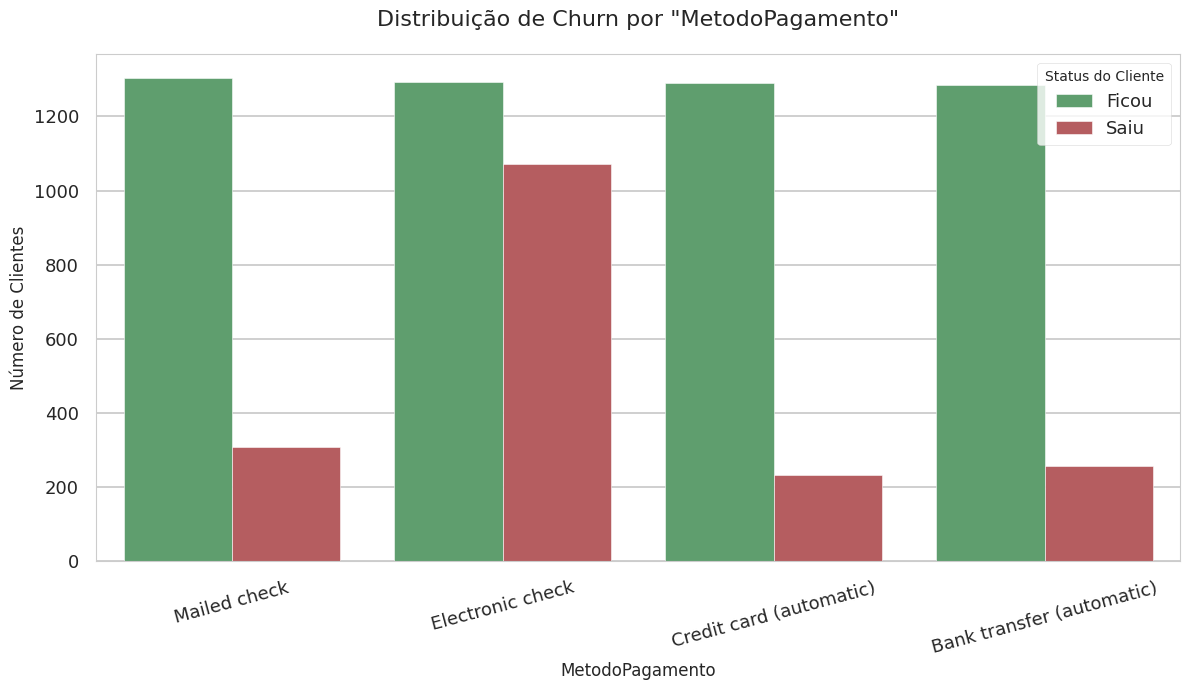

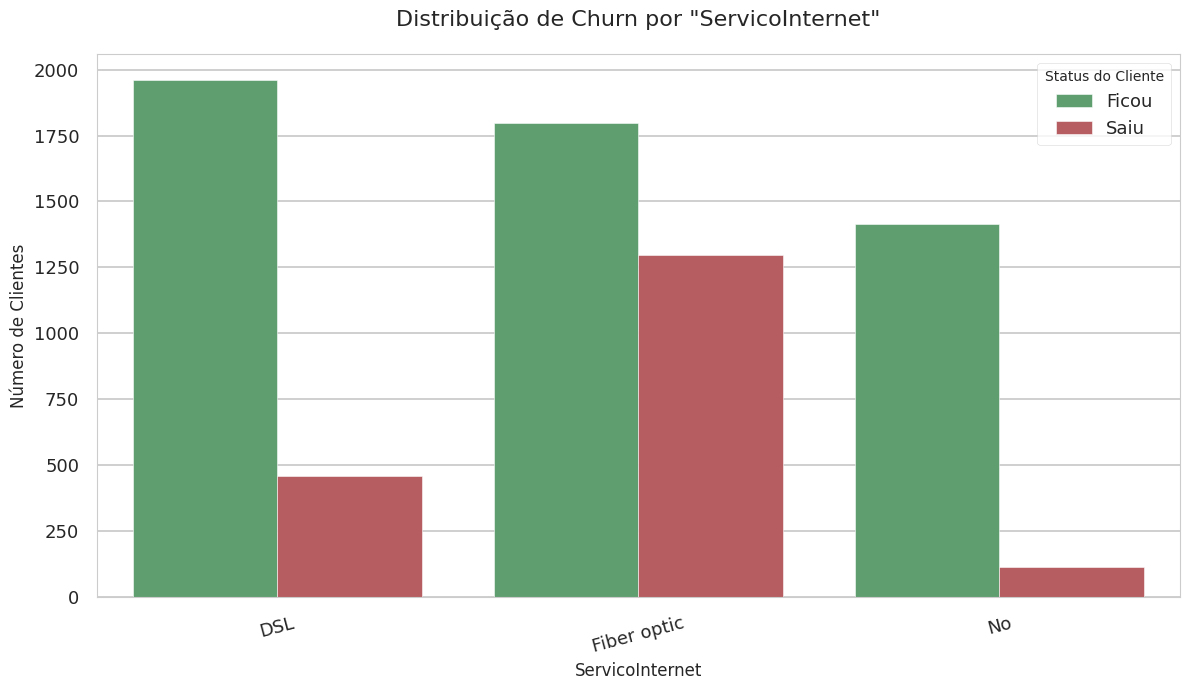

In [23]:
plot_churn_categorico('TipoContrato')
plot_churn_categorico('MetodoPagamento')
plot_churn_categorico('ServicoInternet')

### c) Churn vs. Variáveis Numéricas

Os gráficos de violino ilustraram vividamente o comportamento dos clientes:

Meses de Contrato (Tenure): O gráfico mostra que a evasão é um fenômeno de "início de relacionamento". O violino dos que saem é extremamente concentrado nos primeiros meses, afinando drasticamente com o passar do tempo.

Fatura Mensal: Revelou-se uma clara "zona de perigo" entre R$ 70 e R$ 105, onde a densidade de clientes que cancelam é máxima. Em contrapartida, clientes com faturas baixas (em torno de R$ 20) são extremamente leais.

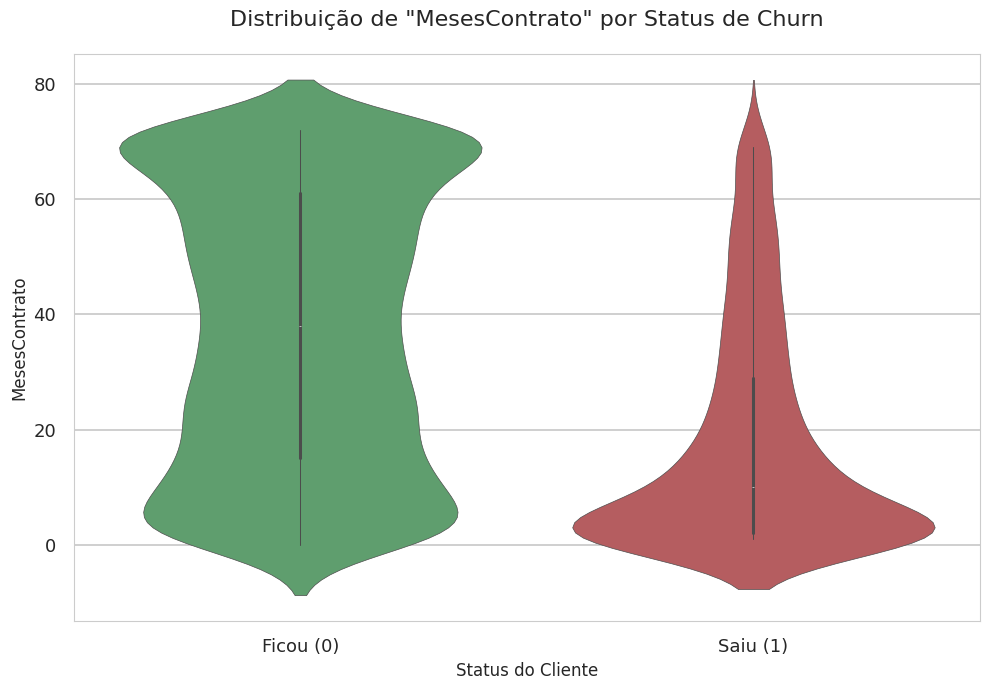

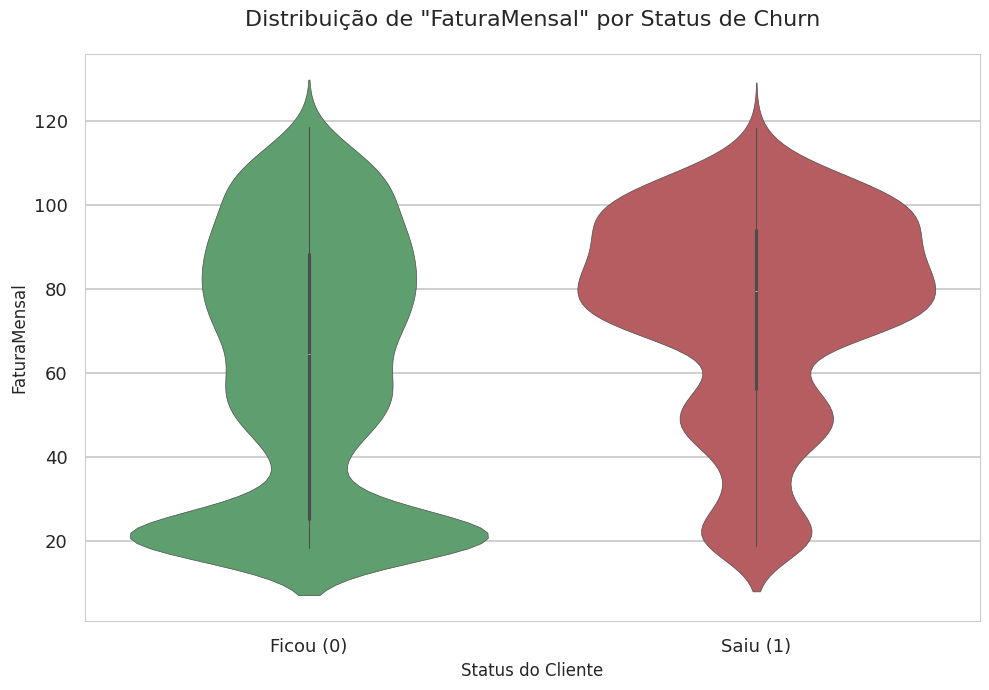

In [24]:
plot_churn_numerico('MesesContrato')
plot_churn_numerico('FaturaMensal')

##4. Conclusões e Insights
A análise dos dados nos permite traçar um perfil claro do cliente com maior probabilidade de evasão:

Perfil de Risco Máximo: Um cliente com contrato mensal, que paga sua fatura via boleto eletrônico e possui um plano de fibra óptica com valor entre R$ 70 e R$ 105.

O Contrato Mensal é uma Porta de Saída: A ausência de um compromisso de longo prazo é o principal fator que facilita o cancelamento.

Os Primeiros Meses são Críticos: A maior parte das perdas de clientes ocorre no início da sua jornada. A lealdade é construída com o tempo.

Atrito no Pagamento Gera Churn: A necessidade de uma ação manual mensal para pagar (boleto) está fortemente correlacionada à evasão, ao contrário dos métodos automáticos que garantem conveniência e estabilidade.

## 5. Recomendações
Com base nos insights gerados, as seguintes ações estratégicas são recomendadas:

Ação 1: Campanhas de Migração de Contrato: Criar ofertas agressivas e personalizadas para clientes com contrato Month-to-month, incentivando a migração para planos anuais com benefícios claros (desconto, serviço adicional, etc.), especialmente para aqueles que entram na "zona de perigo" de faturamento.

Ação 2: Otimizar a Experiência de Pagamento: Desenvolver uma campanha para incentivar a migração de clientes do Electronic check para métodos de pagamento automático, oferecendo um pequeno desconto na primeira fatura após a troca ou outro benefício.

Ação 3: Fortalecer o Onboarding: Implementar um programa de engajamento proativo para clientes nos primeiros 6 meses. Isso pode incluir contatos da equipe de sucesso do cliente, dicas de uso dos serviços e ofertas especiais para garantir uma percepção positiva de valor desde o início.

Ação 4: Ação Preditiva na "Zona de Perigo": Utilizar os dados para prever quando um cliente está prestes a entrar na faixa de R$ 70-R$105 e agir preventivamente. Um contato da equipe de retenção oferecendo um ajuste de plano ou benefício pode evitar o cancelamento antes mesmo que o cliente o considere.




